# Sets (basics)

In [1]:
# Define a set A, containing a few integer numbers.
A = Set([1,2,3,4])

In [2]:
# Define another set B, containing a few integer numbers.
B = Set([1,3])

In [3]:
# Check if B is a subset of set A.
B.issubset(A)

True

In [4]:
# The union of set A and set B equals:
A.union(B)

{1, 2, 3, 4}

In [5]:
# The intersection of set A and set B equals:
A.intersection(B)

{1, 3}

In [6]:
# The difference A - B equals:
A.difference(B)

{2, 4}

In [7]:
# The difference B - A equals:
B.difference(A)

{}

### Check if the elements in a list are unique

In [2]:
a,c=var('a,c')
lst=[1,2,a,c,4,3,7];lst

[1, 2, a, c, 4, 3, 7]

In [3]:
slst=set(lst);slst

{1, 2, 3, 4, c, 7, a}

In [4]:
len(lst)==len(slst)

True

In [5]:
w=[a,3,1,a,1];w

[a, 3, 1, a, 1]

In [6]:
len(w)==len(set(w))

False

# Mean, Covariance and Standard Deviation

In [118]:
data=[8, 2, 9, 1, 10, 1, 3, 6, 3, 3];
data

[8, 2, 9, 1, 10, 1, 3, 6, 3, 3]

In [120]:
# This is the mean value
μ=sum(data)/len(data);μ

23/5

In [121]:
vv=[(data[i]-μ)^2  for i in range(10)];vv

[289/25, 169/25, 484/25, 324/25, 729/25, 324/25, 64/25, 49/25, 64/25, 64/25]

In [122]:
# This is the variance
v=sum(vv)/len(vv);v

256/25

In [123]:
# and the standard deviation
σ=sqrt(v);σ

16/5

# Continuous random variables

<b> Problem </b>:
A continuous random variable $X$ has a probability density function $f$
given by
\begin{align}
	f(x)=
	\begin{cases}
		\frac{1}{72}\left(-x^2+12x-20\right),&4<x<10,
		\\
		0,&\text{otherwise}
	\end{cases}
	\nonumber
\end{align}
Using <tt>sagemath </tt> compute:(a) $\mu=E(X)$; (b) $\text{Var}(X)$; (c)$P(\mu-\sigma<X<\mu)$. (d) Plot the associated CDF $F(a)$ in the range $4<a<10$.

In [7]:
%display latex

In [1]:
f(x)=(-x^2+12*x-20)/72

(a) Computation of $E(X)$

In [2]:
ex=integrate(x*f(x),(x,4,10));ex

13/2

(b) Computation of $\text{Var}(X)$

In [3]:
ex2=integrate(x^2*f(x),(x,4,10));ex2

222/5

In [4]:
varx=ex2-ex^2;varx

43/20

(c) Computation $P(\mu-\sigma<X<\mu)$

In [5]:
mu=ex;sigma=sqrt(varx);
p1=integrate(f(x),(x,4,mu))-integrate(f(x),(x,4,mu-sigma));p1

451/21600*sqrt(43)*sqrt(5) + 43/2880

In [6]:
n(p1,digits=3)

0.321

(d) Plot the associated CDF $F(a)$ in the range $4<a<10$.

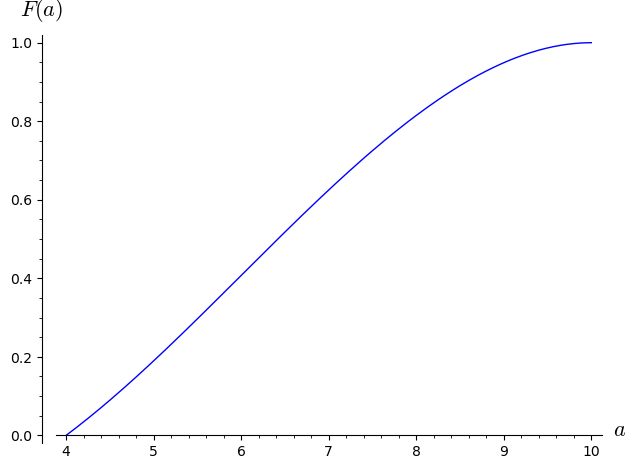

In [7]:
a=var('a')
F(a)=integrate(f(x),(x,4,a));
plot(F(a),(a,4,10),axes_labels=['$a$','$F(a)$'])

# Probability Distributions

In [31]:
sigma=2.
# Assumes μ=0
G=RealDistribution('gaussian', sigma)
G.distribution_function(1.2)

0.16661230144589984

In [32]:
G.cum_distribution_function(5)

0.9937903346742238

In [33]:
G.cum_distribution_function_inv(.5)

0.0

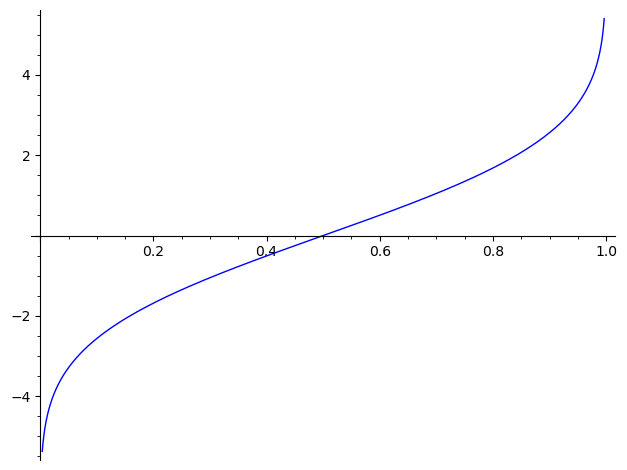

In [34]:
plot(G.cum_distribution_function_inv,(x,0,1))

We plot the Gaussian distribution for $\mu=0$ and $\sigma=1$ (blue),$\sigma=3$ (red)

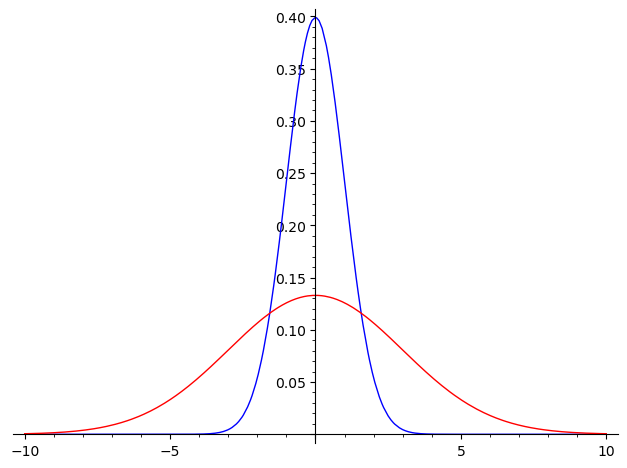

In [12]:
sigma = 1
T1 = RealDistribution('gaussian', sigma)
sigma = 3
T3 = RealDistribution('gaussian', sigma)
plot(T1.distribution_function,(x,-10,10))+plot(T3.distribution_function,(x,-10,10),color="red")

Plots of the CDFs

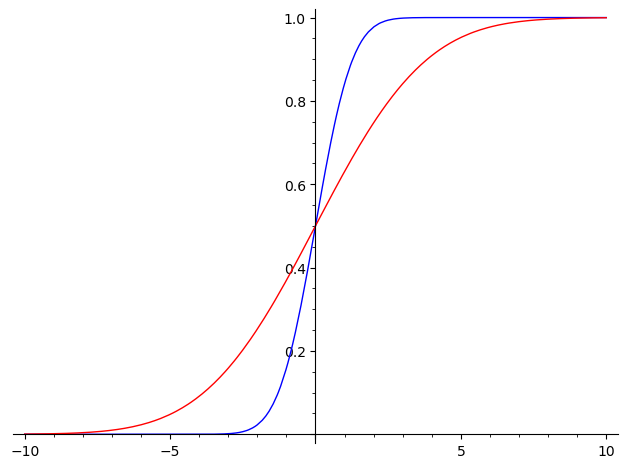

In [13]:
plot(T1.cum_distribution_function,(x,-10,10))+plot(T3.cum_distribution_function,(x,-10,10),color="red")

<b>Problem</b>: The time taken for a student to finish a task is normally distributed with a mean $\mu$ and a standard deviation $\sigma$. It is found that 6\% of the students take less that 7 minutes to complete the task and 75\% take less than 22 minutes. Using <tt>sagemath </tt> find  $\mu$ and $\sigma$ (numerical values). 

In [111]:
G=RealDistribution('gaussian',1)

In [112]:
μ,σ=var('μ,σ')

In [113]:
eq1=(7.-μ)/σ==G.cum_distribution_function_inv(0.06);eq1

-(μ - 7.00000000000000)/σ == -1.554773594596853

In [114]:
eq2=(22.-μ)/σ==G.cum_distribution_function_inv(0.75);eq2

-(μ - 22.0000000000000)/σ == 0.6744897501960817

In [115]:
sols=solve([eq1,eq2],[μ,σ]);sols

[[μ == (4751219148654643/272095693724664), σ == (1830844891162495/272095693724664)]]

In [116]:
n(sols[0][0].rhs(),digits=10),n(sols[0][1].rhs(),digits=10)

(17.46157421, 6.728680142)

# Simulations

## Simulation 1: The sum of two fair dice

We prepare a random sample ($k$ rolls) of the sum of two dice 

In [40]:
k=1000000
events=[ZZ.random_element(1,7)+ZZ.random_element(1,7) for i in range(k)]

We estimate the average

In [42]:
# The average of the sum of two dice
float(sum([events[i] for i in range(k)])/k)

6.997328

Note that the theoretical result is

In [48]:
2*1/36+3*2/36+4*3/36+5*4/36+6*5/36+7*6/36+8*5/36+9*4/36+10*3/36+11*2/36+12*1/36

7

We estimate the probability that the sum equals 7

In [26]:
#The probalitity that the sum equals 7
float(events.count(7))/float(len(events))

0.167308

and compare with the analyticaltheoretical result

In [4]:
n(1/6,digits=4)

0.1667

## Simulation 2: The central limit theorem

Our sample consists of 800 averages of nn points picked from a uniform distribution in the range $(0,1)$.

The histogram of the sample data for nn=1 is

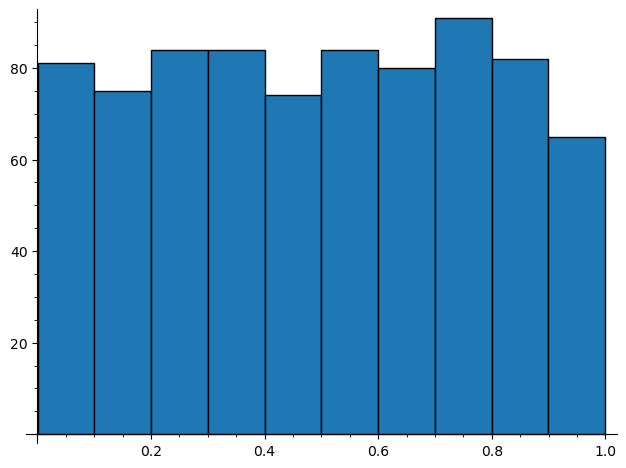

In [27]:
nn=1
sample=[sum([random() for i in range(nn)])/nn for j in range(800)]
histogram(sample)

The histogram of the sample data for nn=3 is

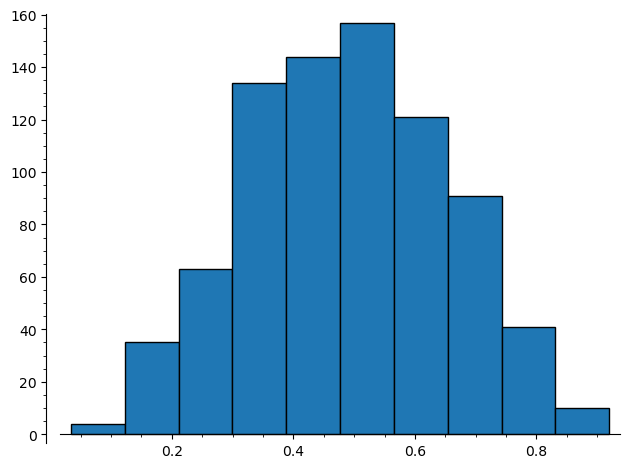

In [28]:
nn=3
sample=[sum([random() for i in range(nn)])/nn for j in range(800)]
histogram(sample)

The histogram of the sample data for nn=30 is

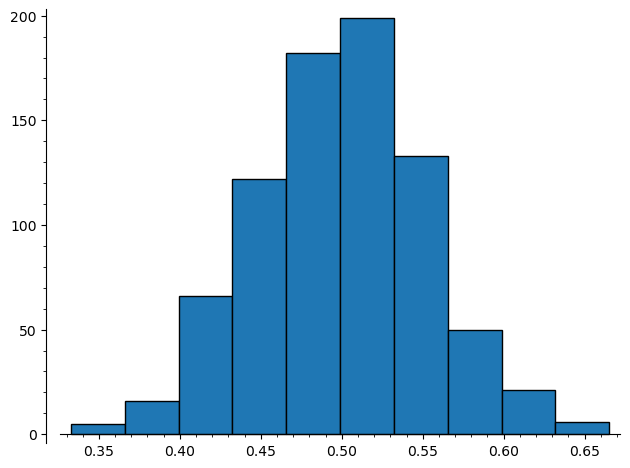

In [29]:
nn=30
sample=[sum([random() for i in range(nn)])/nn for j in range(800)]
histogram(sample)

The histogram of the sample data for nn=100 is

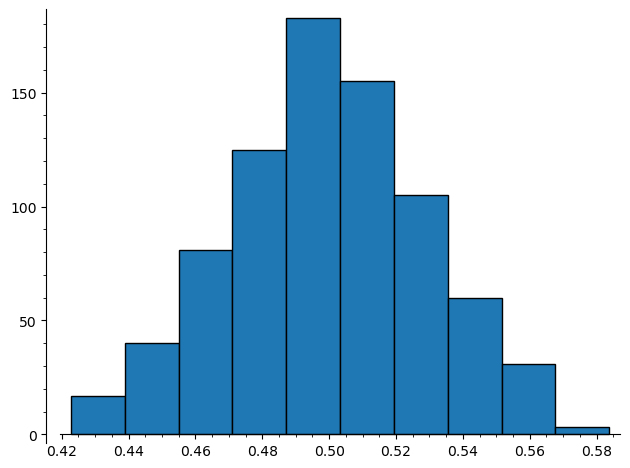

In [30]:
nn=100
sample=[sum([random() for i in range(nn)])/nn for j in range(800)]
histogram(sample)

## Simulation 3: The base rate fallacy 

In [124]:
# Assign disease randomly with probability 0.5%
def disease():
    if(random() <= 0.005):
        return +1
    else:
        return -1

In [125]:
# Assign test results randomly according to given 
# conditional probabilities.
def test(infected):
    r = random()
    if(infected == -1):
        if(r <= 0.05):
            return +1 # false positive
        else:
            return -1
    else:
        if(r < 0.1):
            return -1 # false negative
        else:
            return +1

In [126]:
# Create a random sample of 300000 people: +1 infected , -1 not infected
people=[disease() for x in range(300000)]

# Assign random test results to the above people
peopleΤested = [[x,test(x)] for x in people]

# The probability of being infected while tested positive
peopleΤested.count([+1,+1])/(peopleΤested.count([-1,+1]) + peopleΤested.count([+1,+1]))

0.08187952100176281